Yap Yoon 5590 ICP 4

1) Numpy

Import the numpy library

In [1]:
import numpy as np

Create the initial vector

In [2]:
vect = np.random.randint(1, 21, size = (1,15))
print("Initial vector of 15")
print(vect)

Initial vector of 15
[[17 16 17  8 11 16 10  4 18 16  8 11 14 11 14]]


Reshape the vector into a 3 by 5 array

In [3]:
reshap = vect.reshape(3, 5)
print("Reshaped array")
print(reshap)

Reshaped array
[[17 16 17  8 11]
 [16 10  4 18 16]
 [ 8 11 14 11 14]]


Print the array shape

In [4]:
print("Shape of the array")
print(reshap.shape)

Shape of the array
(3, 5)


Find the max values of each row. Replace the max in each row with 0 using the where method to identify the max in each row and replace the value with 0

In [6]:
row_max = reshap.max(axis = 1).reshape(-1, 1)
np.where(reshap != row_max, reshap, 0)

array([[ 0, 16,  0,  8, 11],
       [16, 10,  4,  0, 16],
       [ 8, 11,  0, 11,  0]])

Extract a diagonal from the reshap array and construct a diagonal array. The diagonal extracted and the diagonal array are saved to separate .npy file. The files are loaded and printed out to make sure the files were created correctly.

In [8]:
dia1 = np.diag(reshap)
dia2 = np.diag(dia1)
print(dia1)
print(dia2)
np.save('outfile1.npy', dia1)
np.save('outfile2.npy', dia2)

data = np.load('outfile1.npy')
print('\n')
print(data)
data = np.load('outfile2.npy')
print(data)

[17 10 14]
[[17  0  0]
 [ 0 10  0]
 [ 0  0 14]]


[17 10 14]
[[17  0  0]
 [ 0 10  0]
 [ 0  0 14]]


2) Pandas

Import the pandas library

In [9]:
import pandas as pd

Read the data.csv file

In [11]:
data = pd.read_csv("data.csv")

Show the basic statistical description on the data

In [12]:
data.describe()

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,266.379919
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


Check the data for any null values

In [13]:
data[data.isnull().any(axis = 1)].head()

,Duration,Pulse,Maxpulse,Calories
17,45,90,112,NaN
27,60,103,132,NaN
91,45,107,137,NaN
118,60,105,125,NaN
141,60,97,127,NaN


Replace the NaN values with the mean

In [14]:
data['Calories'].fillna(value = data['Calories'].mean(), inplace=True)
print(data)

     Duration  Pulse  Maxpulse  Calories
0          60    110       130     409.1
1          60    117       145     479.0
2          60    103       135     340.0
3          45    109       175     282.4
4          45    117       148     406.0
..        ...    ...       ...       ...
164        60    105       140     290.8
165        60    110       145     300.0
166        60    115       145     310.2
167        75    120       150     320.4
168        75    125       150     330.4

[169 rows x 4 columns]


Checking if there are NaN values left in the data

In [15]:
data[data.isnull().any(axis = 1)].head()

,Duration,Pulse,Maxpulse,Calories


Aggregating two data columns (Pulse and Maxpulse) with min, max, count, and mean

In [16]:
data[['Pulse', 'Maxpulse']].agg(['min', 'max', 'count', 'mean'])

,Pulse,Maxpulse
min,80.000000,100.000000
max,159.000000,184.000000
count,169.000000,169.000000
mean,107.461538,134.047337


Filtering the dataframe to select rows with calories values between 500 and 1000

In [17]:
sub_data = data[data['Calories'].between(500, 1000)]
print(sub_data)

     Duration  Pulse  Maxpulse  Calories
51         80    123       146     643.1
62        160    109       135     853.0
65        180     90       130     800.4
66        150    105       135     873.4
67        150    107       130     816.0
72         90    100       127     700.0
73        150     97       127     953.2
75         90     98       125     563.2
78        120    100       130     500.4
83        120    100       130     500.0
90        180    101       127     600.1
99         90     93       124     604.1
101        90     90       110     500.0
102        90     90       100     500.0
103        90     90       100     500.4
106       180     90       120     800.3
108        90     90       120     500.3


Filtering the dataframe to select rows with calories values greater than 500 and pulse values less than 100

In [19]:
filtered_data = data[data['Calories'] > 500][data[data['Calories'] > 500]['Pulse'] < 100]
print(filtered_data)

     Duration  Pulse  Maxpulse  Calories
65        180     90       130     800.4
70        150     97       129    1115.0
73        150     97       127     953.2
75         90     98       125     563.2
99         90     93       124     604.1
103        90     90       100     500.4
106       180     90       120     800.3
108        90     90       120     500.3


Create a modified dataframe that has all the data except for the "Maxpulse" column

In [17]:
df_modified = data.loc[:, data.columns != 'Maxpulse']
print(df_modified)

     Duration  Pulse  Calories
0          60    110     409.1
1          60    117     479.0
2          60    103     340.0
3          45    109     282.4
4          45    117     406.0
..        ...    ...       ...
164        60    105     290.8
165        60    110     300.0
166        60    115     310.2
167        75    120     320.4
168        75    125     330.4

[169 rows x 3 columns]


Delete the "Maxpulse" column from the "data" dataframe

In [18]:
del data['Maxpulse']
print(data)

     Duration  Pulse  Calories
0          60    110     409.1
1          60    117     479.0
2          60    103     340.0
3          45    109     282.4
4          45    117     406.0
..        ...    ...       ...
164        60    105     290.8
165        60    110     300.0
166        60    115     310.2
167        75    120     320.4
168        75    125     330.4

[169 rows x 3 columns]


Convert the "Calories" column into the int datatype

In [19]:
data["Calories"] = data["Calories"].astype(int)
print(data.dtypes)

Duration    int64
Pulse       int64
Calories    int64
dtype: object


Create a scatter plot for the "Duration" and "Calories" columns

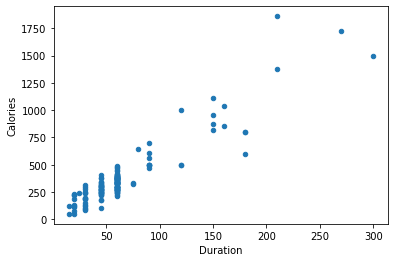

In [20]:
data.plot.scatter(x = 'Duration', y = 'Calories')

3) Matplotlib

Import the pyplot and image libraries from the matplotlib library

In [22]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Using matplotlib, read the provided image

In [23]:
image = mpimg.imread('umkc.jpg')

Show the image

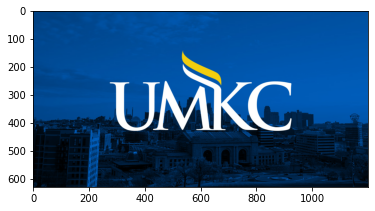

In [24]:
plt.imshow(image)

Print the image shape

In [25]:
image.shape

(630, 1200, 3)

Crop the border of the image (background) to keep the word UMKC by splicing the image and using numpy

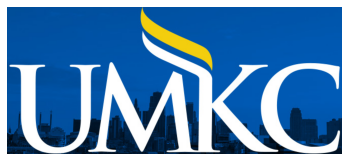

In [37]:
image_cropped = image[140:430, 270:930]
plt.axis("off")
plt.imshow(image_cropped)

Write the cropped image as a new file called "cropped_image.jpg"

In [27]:
plt.imsave('cropped_image.jpg', image_cropped)

Change the background of the image to black using the numpy where method

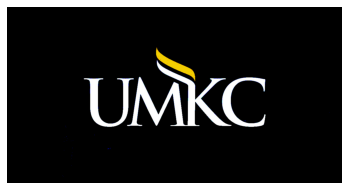

In [29]:
np_where_image = np.where(image < [200,200,200], [0,0,0], image)
plt.axis("off")
plt.imshow(np_where_image)

Change the array type from int32 to uint8

In [30]:
np_where_image.dtype

dtype('int64')

In [31]:
np_where_image = np_where_image.astype(np.uint8)
np_where_image.dtype

dtype('uint8')

Write the new image as a new file called "np_where_image.jpg"

In [32]:
plt.imsave('np_where_image.jpg', np_where_image)